<a href="https://colab.research.google.com/github/JuliaVazTostes/curso_data_science/blob/master/M%C3%B3dulo_3_Projeto_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são todas as doenças que afetam, de alguma maneira, o coração ou os vasos sanguíneos, ou seja, o sistema cardiovascular. Podemos citar como exemplos doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

É uma das principais causas de morte em todo o mundo, e estima-se que cerca de 90% dessas doençaspoderiam ser evitadas por mudanças no *lifestyle* e adoção de hábitos saudáveis.

Existem hoje várias pesquisas na área de *Machine Learning* visando auxiliar na construção de modelos preditivos que amparam a previsão de desenvolvimento de doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

O que corrobora com a conclusão de que o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais da saúde insumos tecnológicos e de predição cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

In [66]:
# Ver a "cara" do dataframe:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [67]:
# Investigar os valores contidos em 'num'
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [7]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

# ANÁLISE EXPLORATÓRIA DE DADOS


In [109]:
# Tamanho do dataframe
print("Dimensões: {}".format(df.shape))

Dimensões: (303, 14)


In [31]:
# Analisar os tipos das variáveis
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [34]:
# Analisar se há ocorrência de valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [110]:
# Descrição estatística de todas as colunas numéricas do dataframe
print("\nResumo estatístico:")
display(df.describe())


Resumo estatístico:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [111]:
# Descrição estatística de uma coluna do dataframe
print("\nResumo estatístico coluna Idade:")
display(df.age.describe())


Resumo estatístico coluna Idade:


count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [112]:
# Descrição estatística de uma seleção de colunas dataframe

print("\nResumo estatístico das principais variáveis:")
display(df.loc[:,['age','sex','num']].describe())


Resumo estatístico das principais variáveis:


,age,sex,num
count,303.000000,303.000000,303.000000
mean,54.438944,0.679868,0.937294
std,9.038662,0.467299,1.228536
min,29.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000
50%,56.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000
max,77.000000,1.000000,4.000000


## ANÁLISE GRÁFICA DOS DADOS


In [36]:
# Gráfico de linhas para os dados do Brasil: df_brasil
# Ver as colunas contidas no dataframe
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


In [37]:
# Analisar ano inicial e final contidos no dataframe - Período série temporal
df_brasil.describe()

,ano,mortes_doencas_cardio
count,14.0000,14.000000
mean,2010.5000,327.792500
std,4.1833,27.813466
min,2004.0000,283.927000
25%,2007.2500,310.798750
50%,2010.5000,329.833000
75%,2013.7500,340.131000
max,2017.0000,383.961000


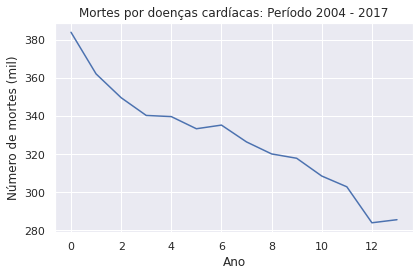

In [113]:
# Gerar o gráfico
fig, ax=plt.subplots()

df_brasil['mortes_doencas_cardio'].plot(kind="line", ax=ax)
ax.set_title("Mortes por doenças cardíacas: Período 2004 - 2017")
ax.set_ylabel("Número de mortes (mil)")
ax.set_xlabel("Ano")

plt.tight_layout()

In [117]:
# Como vemos no eixo x, não ficou o ano, e sim o índice -> Para gerar o gráfico ou passa a informação do eixo x, ou transformar a coluna 'ano' no índice

# Transformar a clonuma 'ano' em índice
df_brasil = pd.read_csv(dataset_brasil, index_col="ano", parse_dates=True)
df_brasil.head()

,mortes_doencas_cardio
ano,
2017-01-01,383.961
2016-01-01,362.091
2015-01-01,349.584
2014-01-01,340.284
2013-01-01,339.672


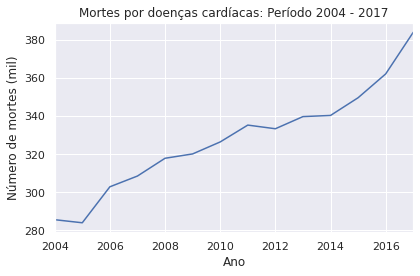

In [118]:
# Gerar o gráfico com a informação de ano no eixo 'X' transformando a coluna 'ano' no índice
fig, ax=plt.subplots()

df_brasil['mortes_doencas_cardio'].plot(kind="line", ax=ax)
ax.set_title("Mortes por doenças cardíacas: Período 2004 - 2017")
ax.set_ylabel("Número de mortes (mil)")
ax.set_xlabel("Ano")

plt.tight_layout()

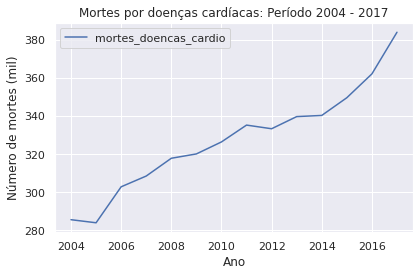

In [120]:
# Passar a informação do eixo x no código ('ano', 'mortes_doencas_cardio', ax=ax)
fig, ax=plt.subplots()

df_brasil.plot('ano', 'mortes_doencas_cardio', ax=ax)
ax.set_title("Mortes por doenças cardíacas: Período 2004 - 2017")
ax.set_ylabel("Número de mortes (mil)")
ax.set_xlabel("Ano")

plt.tight_layout()

### **CONCLUSÃO**:

Como pode ser visualizado no gráfico acima, os dados utilizados sugerem que houve aumento no número de mortes por doenças cardíacas no período compreendido entre os anos de 2004 a 2017, o que corrobora com a informação de que cada vez mais pessoas morrem em decorrência de doenças cardiovasculares no Brasil.

In [68]:
# Visualizar a informação de homens e mulheres em gráfico de barras
# Ver como o dado esta distribuído
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [115]:
# Da pra fazer assim também, fica mais bonito -> Inserir a informação de porcentagem
num_freq = dict(df.num.value_counts())
print("0:\t{} ({:.2f}%)".format(num_freq[0], 100*num_freq[0]/df.shape[0]))
print("1:\t{} ({:.2f}%)".format(num_freq[1], 100*num_freq[1]/df.shape[0]))

0:	164 (54.13%)
1:	55 (18.15%)


In [69]:
dict(df.sex.value_counts())

{0.0: 97, 1.0: 206}

In [0]:
dicionario=dict(df.sex.value_counts())

In [0]:
# Criar o dicionário
dicionario=dict(df.sex.value_counts())

# preparar dados para o pie chart - Extrair os dados para o gráfico de pizza
# '.keys' extrai apenas a chave do dicionário
labels = dicionario.keys()
# Tamanho de cada 'fatia' ->.values extrai apenas os valores do dicionário
sizes = dicionario.values()


In [122]:
# plotar o gráfico de barras
df.sex = df.sex.astype(int)

# 'df.sex = df.sex.astype(int)' converte a variável sexo de float para inteiro para poupar memória de processamento

df.sex.value_counts()

1    206
0     97
Name: sex, dtype: int64

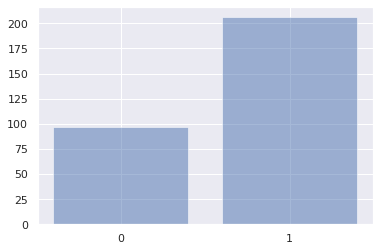

In [123]:
# Plotar o gráfico de barras
x = df.sex.value_counts().index
y = df.sex.value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y, align='center', alpha=0.5)
ax.set_xticks(x)
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

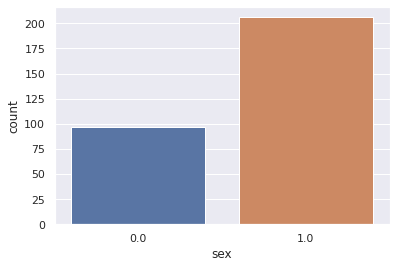

In [55]:
sns.countplot(df["sex"])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


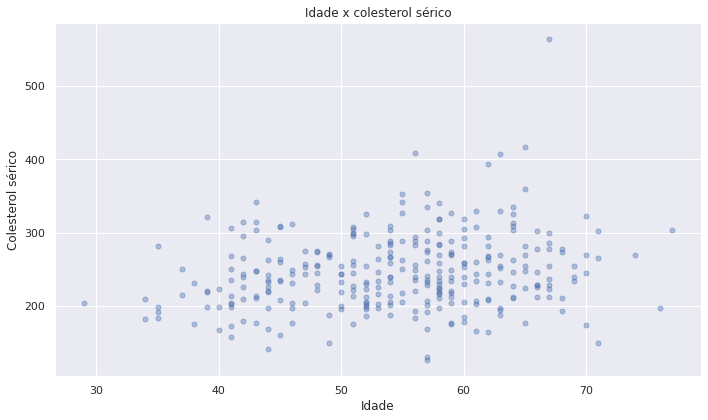

In [87]:
# Gráfico de dispersão para as variáveis idade (age) e colesterol sérico (chol)
fig, ax = plt.subplots(figsize=(10,6))

# 's' controla o tamanho dos pontos
# 'alpha' controla a trnsparência dos pontos -> Possibilita ver sobreposição, onde tem maior concentração dos pontos vai ficar mais escuro
df.plot.scatter(x='age', y='chol', ax=ax, s=25, alpha=0.4)
ax.set_title("Idade x colesterol sérico")
ax.set_ylabel("Colesterol sérico")
ax.set_xlabel("Idade")

plt.tight_layout();

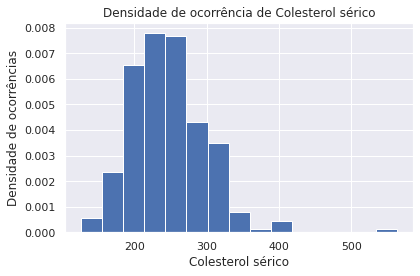

In [131]:
# Histograma para apresetnar a variável colesterol sérico -> Densidade de ocorrências
fig, ax = plt.subplots()

df.chol.plot(kind="hist", ax=ax, density=True, bins=15)
ax.set_title("Densidade de ocorrência de Colesterol sérico")
ax.set_ylabel("Densidade de ocorrências")
ax.set_xlabel("Colesterol sérico")

plt.tight_layout()

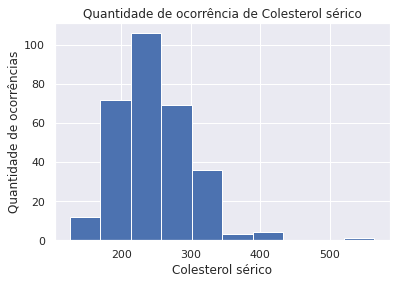

In [132]:
# Pode ser feito também dessa forma -> 
fig, ax = plt.subplots()
df.chol.hist(ax=ax)
ax.set_title("Quantidade de ocorrência de Colesterol sérico")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel('Colesterol sérico')
plt.show()

In [97]:
# Gráfico de pizza para a variavel 'resultado do eletrocardiografia de repouso' (restecg)
# extrair as ocorrências para um dicionário -> O dicionário permite separar as labels do gráfico de pizza
# Primeiro temos que detectar quais são os valores únicos para estudarmos a variável
df.restecg.unique()

array([2., 0., 1.])

In [98]:
# Encontrar quanto tem de cada categoria
df.restecg.value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

In [99]:
# Para gráficos de Pizza é bom separar as labels, por isso criamos o dicionário
dict(df.restecg.value_counts())

{0.0: 151, 1.0: 4, 2.0: 148}

In [0]:
# Criar o dicionário
eletro_repouso = dict(df.restecg.value_counts())

# preparar dados para o pie chart - Extrair os dados para o gráfico de pizza
# '.keys' extrai apenas a chave do dicionário
labels = eletro_repouso.keys()
# Tamanho de cada 'fatia' ->.values extrai apenas os valores do dicionário
sizes = eletro_repouso.values()
# explode permite distanciar uma fatia, ou mais, das demais
explode = (0.1, 0, 0)

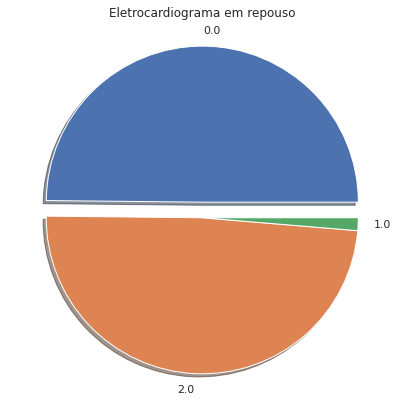

In [102]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, explode, labels, shadow=True)
# Obs.: Nãp precisa colocar sizes=sizes, explode=explode, labels=labels por que estão de forma sequencial, conforme orientações da função (para ver: Tab)
# 'shadow=True' da a sombra no gráfico
ax.set_title("Eletrocardiograma em repouso")

plt.tight_layout()

### **Onde:**
*   0: normal
*   1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
*   2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

In [106]:
# Heatmap com as correlações -> 1º matriz de correlação
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


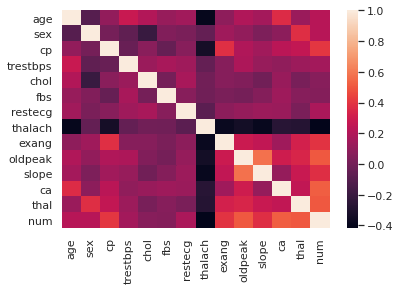

In [107]:
# Heatmap com as correlações
sns.heatmap(df.corr())
plt.show()

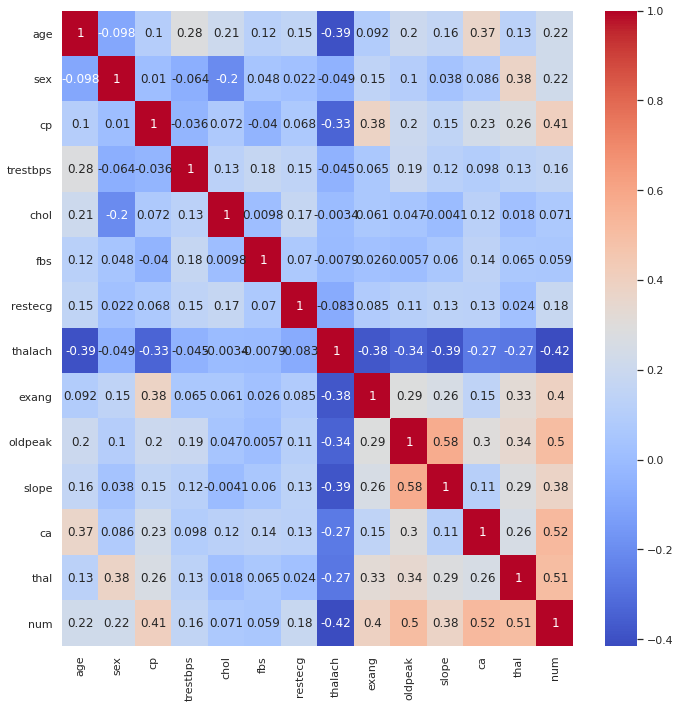

In [133]:
# Outras configurações de Heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm');
plt.tight_layout()